# Logistic Map

We study one-dimensional logistic map:

$$ x_{n+1} = ax_n(1 - x_n) $$

where $n = 0, 1, ...$

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
import numba as nb
from matplotlib import pyplot as plt

First we define the function to calculate nth element of a logistic map

In [2]:
x_n, a = sp.symbols('x_n a')
x_n_plus1 = sp.Function('x_{n+1}')(x_n)
x_n_plus1

x_{n+1}(x_n)

In [3]:
x_n

x_n

In [4]:
quadratic_map_symbolic = sp.Eq(x_n_plus1, a * x_n * (1 - x_n))
quadratic_map_symbolic

Eq(x_{n+1}(x_n), a*x_n*(1 - x_n))

In [5]:
@nb.njit()
def quadratic_map_expression(x, a):
    return a * x * (1 - x)

In [6]:
x_0, n = 0.1, 51
a_list = [2.9, 3.1]
logistic_maps = [logistic_map(x_0, n, quadratic_map_expression, a) for a in a_list]

In [7]:
def plot_logistic_maps(maps, a_params, map_expr):
    figure, axes = plt.subplots(1, len(maps), layout='constrained', figsize=(2 + 5*len(maps), 6))
    for ax, map_, a in zip(figure.axes, maps, a_params):
        ax.scatter(np.arange(len(map_)), map_, color='black')
        ax.set(xlabel='$n$', ylabel='$x_n$', title=f'$a = {a}$')
        ax.grid()
    figure.suptitle(f'Logistic map\n${sp.latex(map_expr)}$')

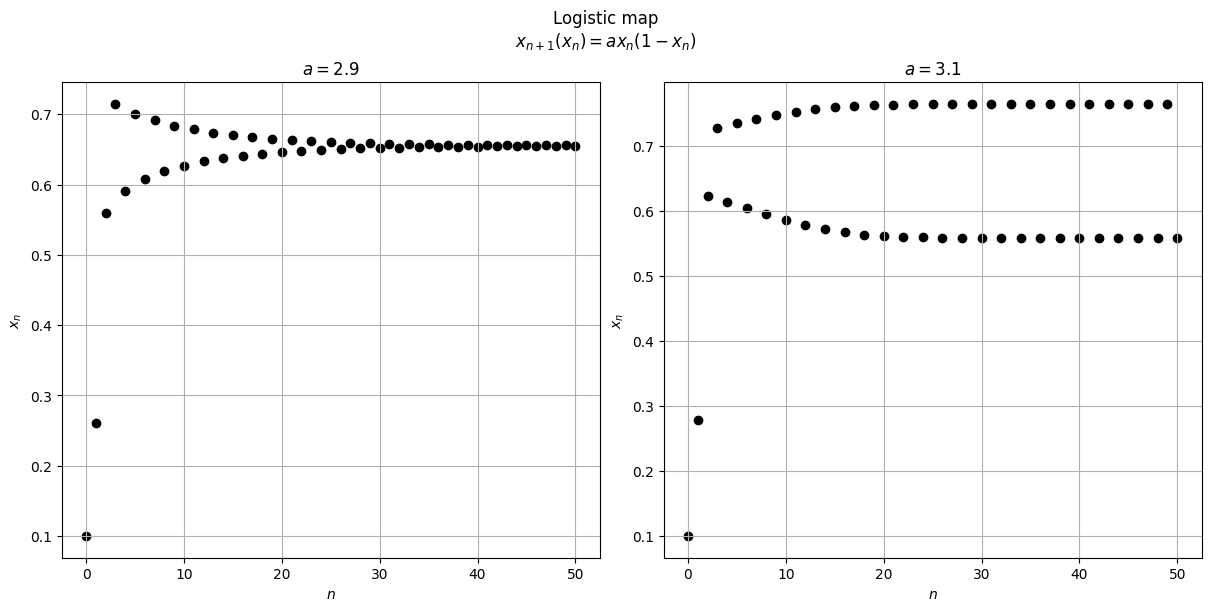

In [8]:
plot_logistic_maps(logistic_maps, a_list, quadratic_map_symbolic)

In [9]:
def plot_bifurcation_diagram(bifurcation_diagram, a_params, skip, map_expr, scatter_params, axes_params):
    figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
    for param, column in zip(a_params, bifurcation_diagram):
        y_axis_values = column[skip:]
        axes.scatter(np.full(len(y_axis_values), param), y_axis_values, **scatter_params)
    title = f'Bifurcation Diagram\n${sp.latex(map_expr)}$\n$x_0 = {x_0}$, $n \in ({skip}, {bifurcation_diagram.shape[1]-1})$'
    axes.set(xlabel='$a$', ylabel='$x_n$', title=title, **axes_params)

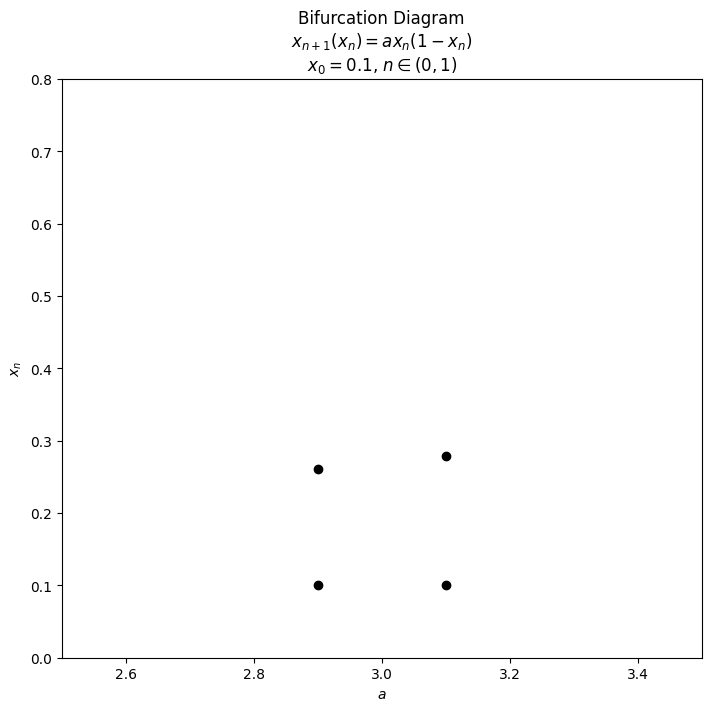

In [10]:
diagram = logistic_map_parameter_dependence(x_0, 2, quadratic_map_expression, np.array(a_list))
plot_bifurcation_diagram(diagram, a_list, 0, quadratic_map_symbolic, {'color': 'black'}, {'xlim': (2.5, 3.5), 'ylim':(0, 0.8)})

### Now we plot bifurcation diagram in the interval $(2.9, 4)$

In [11]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 2.9, 4, 500
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, quadratic_map_expression, a_interval)

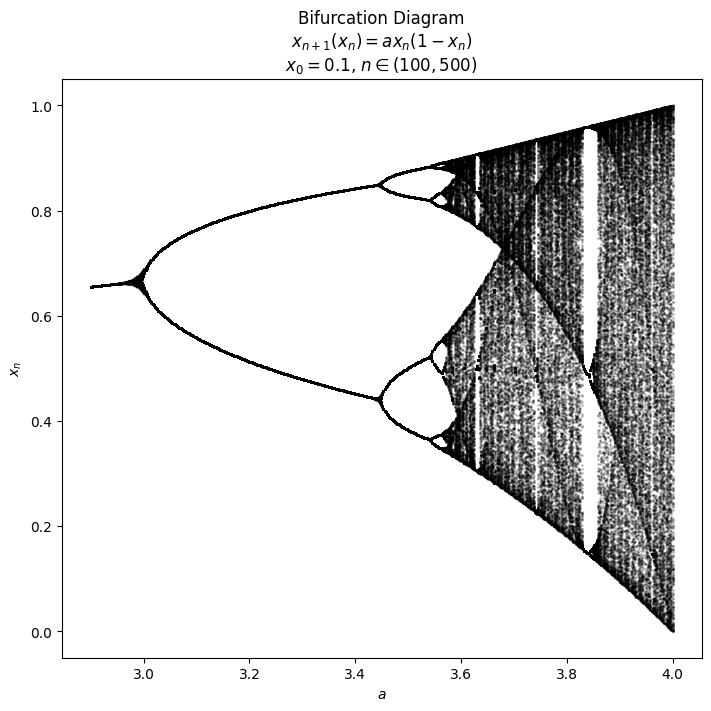

In [12]:
plot_bifurcation_diagram(diagram, a_interval, skip, quadratic_map_symbolic, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [13]:
x_0, n, skip = 0.5, 501, 100
a_start, a_end, quality = 1, 4, 1500
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, quadratic_map_expression, a_interval)

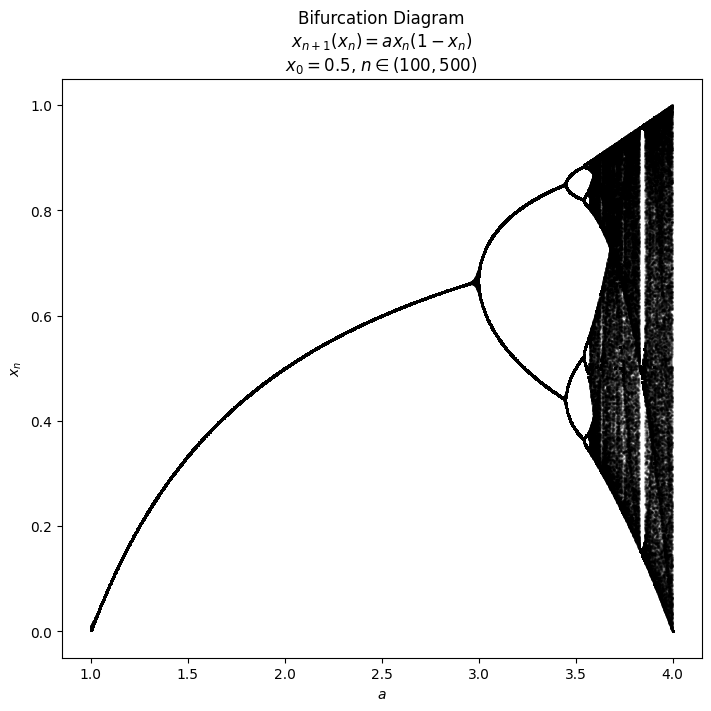

In [14]:
plot_bifurcation_diagram(diagram, a_interval, skip, quadratic_map_symbolic, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [15]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 3.6, 4, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, quadratic_map_expression, a_interval)

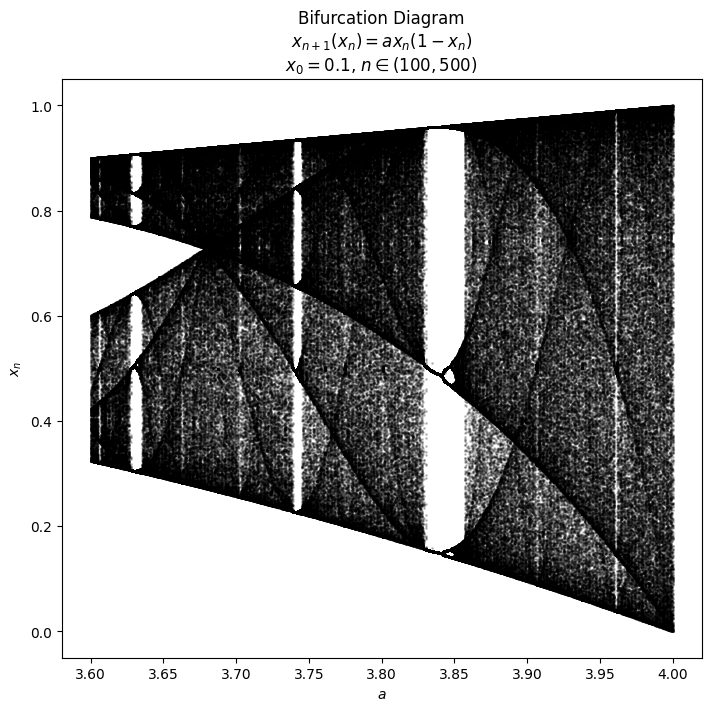

In [16]:
plot_bifurcation_diagram(diagram, a_interval, skip, quadratic_map_symbolic, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [17]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 3.4, 3.64, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, quadratic_map_expression, a_interval)

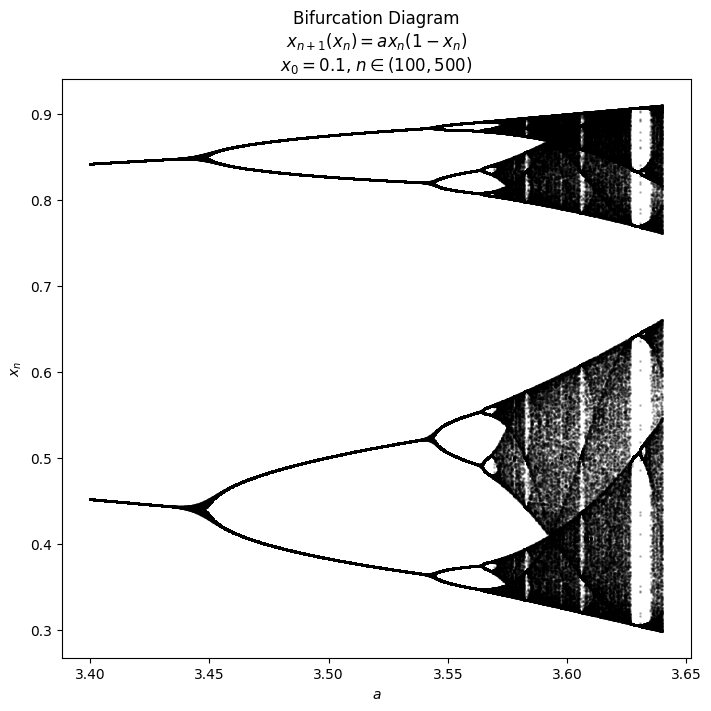

In [18]:
plot_bifurcation_diagram(diagram, a_interval, skip, quadratic_map_symbolic, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

# Cubic map 

$$ x_{n+1} = ax_n - x_n^3 $$

In [19]:
cubic_map_symbolic = sp.Eq(x_n_plus1, a * x_n * (1 - x_n ** 2))
cubic_map_symbolic

Eq(x_{n+1}(x_n), a*x_n*(1 - x_n**2))

In [20]:
@nb.njit()
def cubic_map_expression(x, a):
    return a * x * (1 - x**2)

In [21]:
x_0, n = 0.1, 51
a_list = [1.8, 2.22]
logistic_maps = [logistic_map(x_0, n, cubic_map_expression, a) for a in a_list]

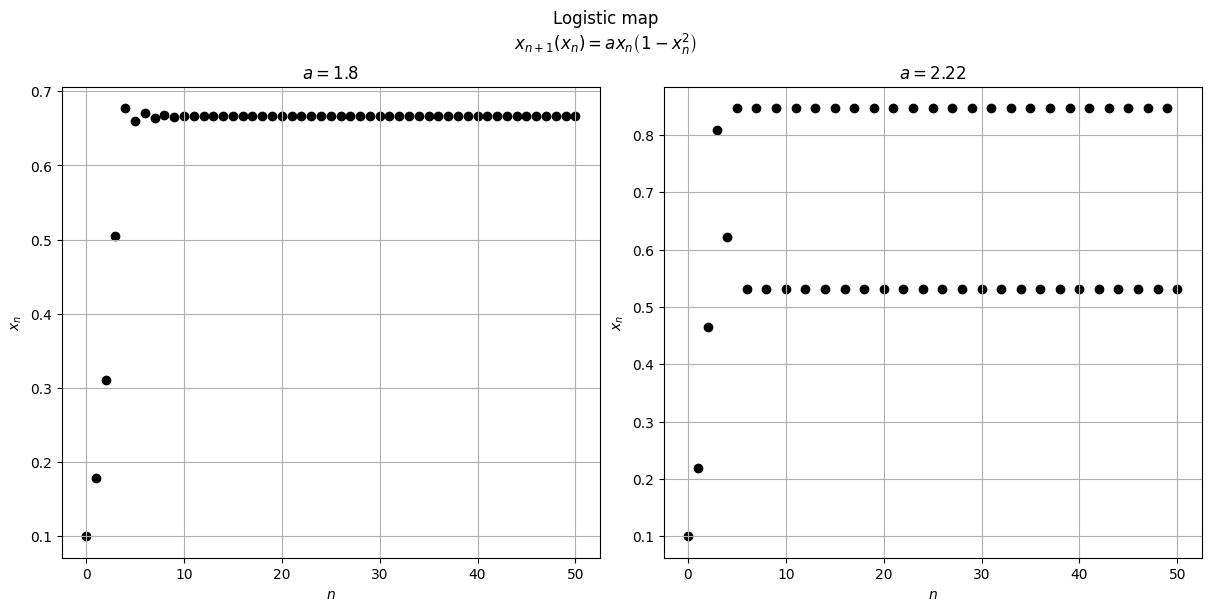

In [22]:
plot_logistic_maps(logistic_maps, a_list, cubic_map_symbolic)

In [23]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 1, 3.2, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, cubic_map_expression, a_interval)

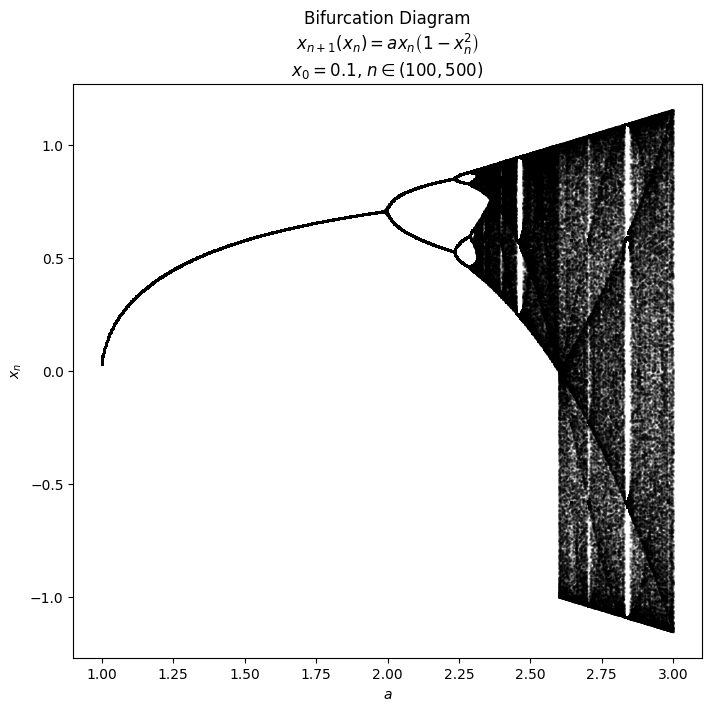

In [24]:
plot_bifurcation_diagram(diagram, a_interval, skip, cubic_map_symbolic, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [25]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 1.8, 3, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, cubic_map_expression, a_interval)

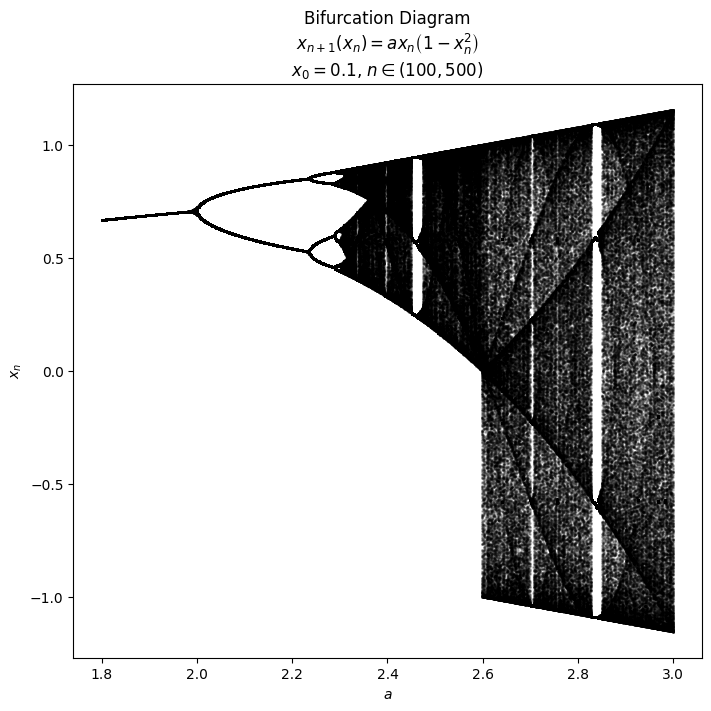

In [26]:
plot_bifurcation_diagram(diagram, a_interval, skip, cubic_map_symbolic, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

In [27]:
x_0, n, skip = 0.1, 501, 100
a_start, a_end, quality = 2.5, 2.7, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, cubic_map_expression, a_interval)

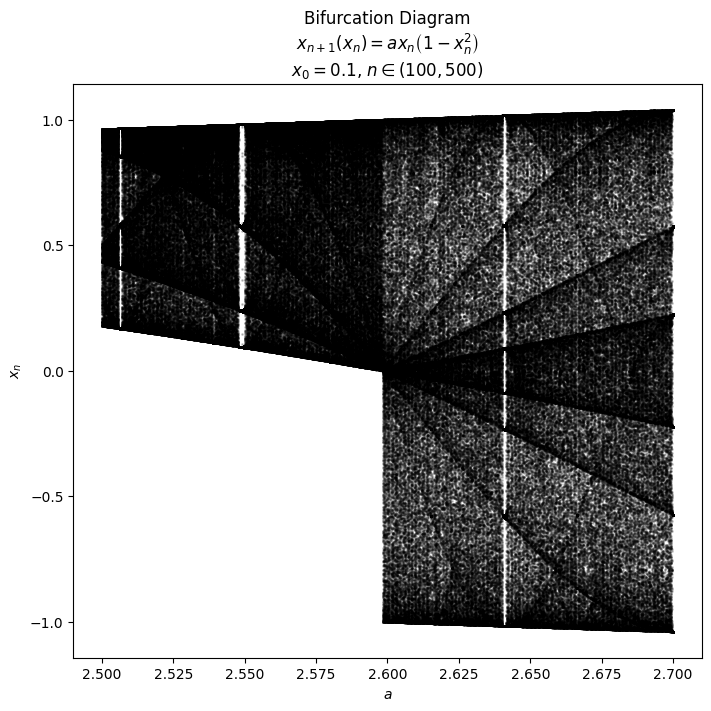

In [28]:
plot_bifurcation_diagram(diagram, a_interval, skip, cubic_map_symbolic, {'color': 'black', 's': 1, 'alpha': 0.2}, {})

# Liapunov exponent

Liapunov exponent measures whether system is stable or chaotic.

$$ \lambda = \lim_{n \rightarrow \infty}\frac{1}{n}\sum^{n-1}_{k=0}\ln{|f'(x_k)|}$$

We check first for the logistic map. Let's calculate its derivative:

In [29]:
quadratic_map_diff_symbolic = sp.Eq(x_n_plus1.diff(x_n), quadratic_map_symbolic.rhs.diff(x_n).simplify())
quadratic_map_diff_symbolic

Eq(Derivative(x_{n+1}(x_n), x_n), a*(1 - 2*x_n))

And now we define the function to use with numba

In [30]:
@nb.njit()
def quadratic_map_derivative(x, a):
    return a * (1 - 2*x)

In [31]:
x_0, n = 0.1, 30
a_val = 3.1
seq = logistic_map(x_0, n, quadratic_map_expression, a_val)
exp = calculate_liapunov_exponent(seq, quadratic_map_derivative, a_val)
exp

-0.0986110899173947

In [32]:
x_0, n = 0.1, 501
a_start, a_end, quality = 2.9, 4, 1000
a_interval = np.linspace(a_start, a_end, quality)
diagram = logistic_map_parameter_dependence(x_0, n, quadratic_map_expression, a_interval)
liapunov_exponent_val = calculate_liapunov_exponent_for_diagram(diagram, a_interval, quadratic_map_derivative)

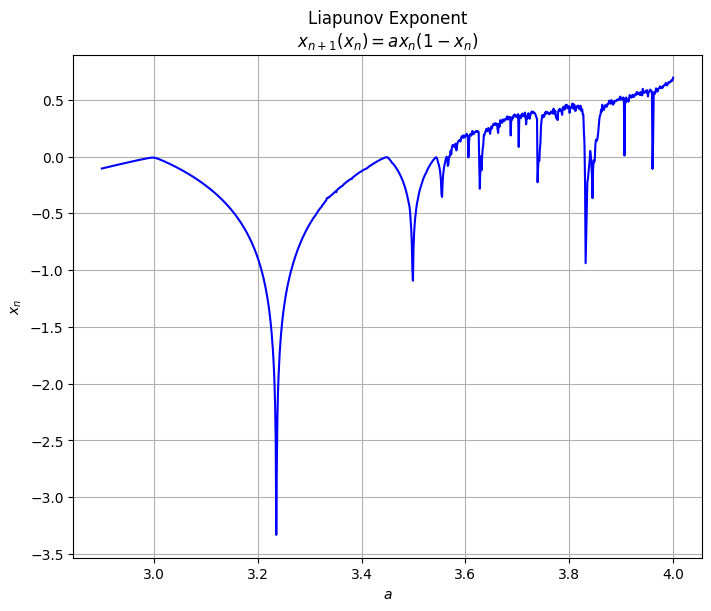

In [33]:
fig, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(a_interval, liapunov_exponent_val, color='blue')
axes.grid()
_=axes.set(xlabel=f'${a}$', ylabel=f'${x_n}$', title=f'Liapunov Exponent\n${sp.latex(quadratic_map_symbolic)}$')

In [34]:
def plot_diagram_liapunov(boundaries, expression, expression_derivative, symbolic_expression):
    x_0, n, skip = 0.1, 501, 100
    quality, skip = 1000, 100
    a_interval = np.linspace(*boundaries, quality)
    diagram = logistic_map_parameter_dependence(x_0, n, expression, a_interval)
    liapunov_exponent_val = calculate_liapunov_exponent_for_diagram(diagram, a_interval, expression_derivative) 
    figure, axes = plt.subplots(2, 1, layout='constrained', figsize=(8, 7))
    for param, column in zip(a_interval, diagram):
        y_axis_array = column[skip:]
        axes[0].scatter(np.full(len(y_axis_array), param), y_axis_array, c='black', s=1, alpha=0.2)
    axes[0].set(ylabel=f'${x_n}$', title=f'Bifurcation Diagram and Liapunov Exponent\n${sp.latex(symbolic_expression)}$')
    axes[1].plot(a_interval, liapunov_exponent_val, color='blue', zorder=2)
    axes[1].axhline(y=0, color='black', linestyle='--', zorder=1, alpha=0.5)
    axes[1].grid()
    axes[1].set(xlabel=f'${a}$', ylabel=f'${x_n}$')

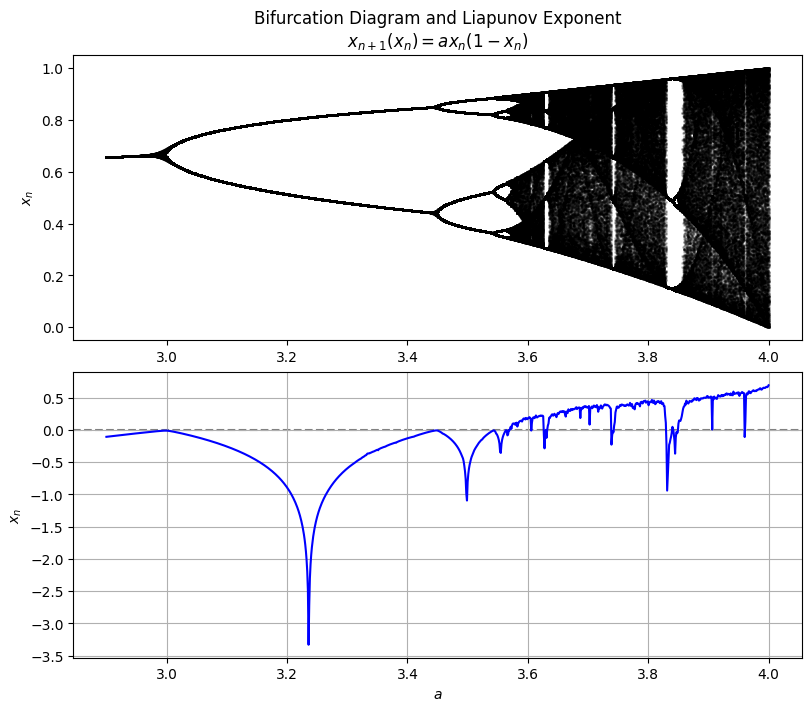

In [35]:
plot_diagram_liapunov((2.9, 4), quadratic_map_expression, quadratic_map_derivative, quadratic_map_symbolic)

In [37]:
cubic_map_diff_symbolic = sp.Eq(x_n_plus1.diff(x_n), cubic_map_symbolic.rhs.diff(x_n).simplify())
cubic_map_diff_symbolic

Eq(Derivative(x_{n+1}(x_n), x_n), a*(1 - 3*x_n**2))

In [39]:
@nb.njit()
def cubic_map_derivative(x, a):
    return a * (1 - 3*x**2)

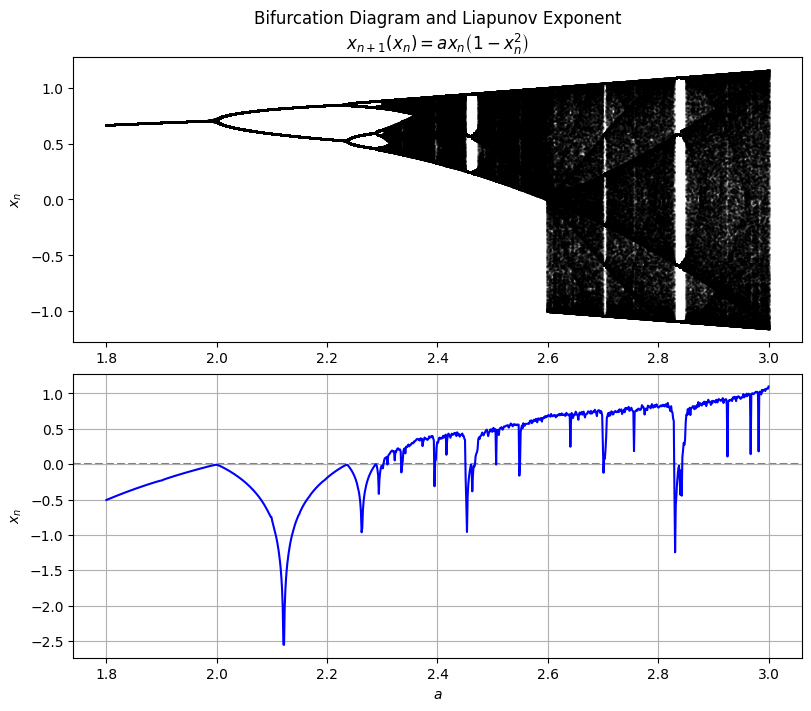

In [41]:
plot_diagram_liapunov((1.8, 3), cubic_map_expression, cubic_map_derivative, cubic_map_symbolic)

## Quartic Map

In [42]:
quartic_map_symbolic = sp.Eq(x_n_plus1, a * x_n * (1 - x_n ** 3))
quartic_map_symbolic

Eq(x_{n+1}(x_n), a*x_n*(1 - x_n**3))

In [43]:
quartic_map_diff_symbolic = sp.Eq(x_n_plus1.diff(x_n), quartic_map_symbolic.rhs.diff(x_n).simplify())
quartic_map_diff_symbolic

Eq(Derivative(x_{n+1}(x_n), x_n), a*(1 - 4*x_n**3))

In [44]:
@nb.njit()
def quartic_map_expression(x, a):
    return a * x * (1 - x**3)

@nb.njit()
def quartic_map_derivative(x, a):
    return a * (1 - 4*x**3)

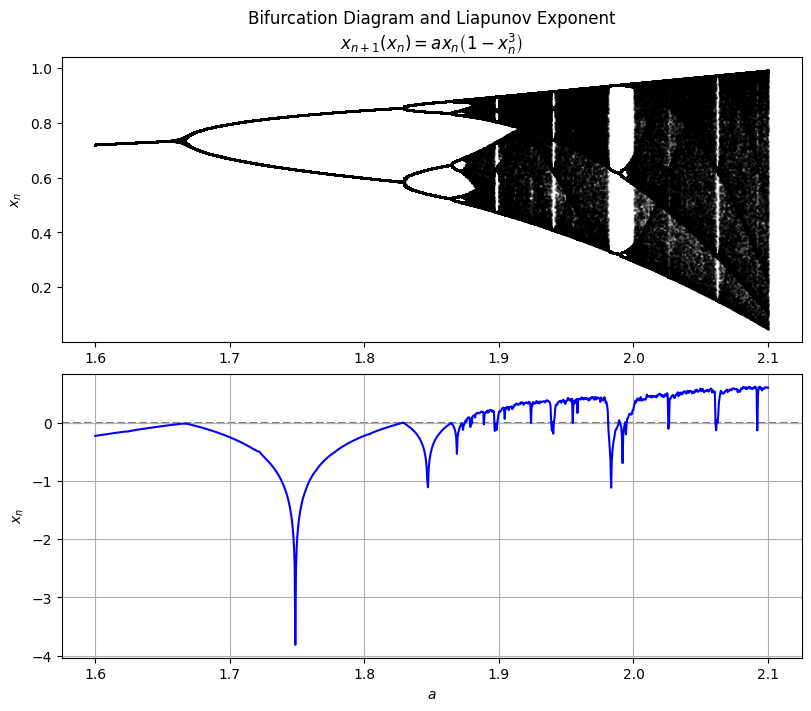

In [49]:
plot_diagram_liapunov((1.6, 2.1), quartic_map_expression, quartic_map_derivative, quartic_map_symbolic)